In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#import models
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn import model_selection
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from tabulate import _table_formats, tabulate

from sklearn import metrics

In [21]:
datas = '/Users/pkrok/OneDrive/Python/Giannakopoulos/Data.xlsx'

In [22]:
pd.set_option("display.max_columns", None)
df=pd.read_excel(datas)
df.head(2)
df['logD'] = np.log10(df['diffusivity'])
# df = df.dropna()
df

,type,cell,aperture,aperture2,ExpansionRatio,M-N,Μ-N_lff,Μ-N_kFF,ionicRad,MetalCharge,apertureAtom_charge,apertureAtom_σ,apertureAtom_e,linker_length1,linker_length2,linker_length3,linker_mass1,linker_mass1.1,linker_mass3,func1_length,func2_length,func3_length,func1_mass,func2_mass,func3_mass,func1_charge,func2_charge,func3_charge,gas,mass,Dbulk,ascentricF,size - van der Waals (Å),size - kinetic diameter (Å),diffusivity,solubility,permeability,Unnamed: 37,Unnamed: 38,Unnamed: 39,aperture2.1,Dresults,number of modifications,logD
0,CdIF-1,1.8077,3.92,3.93000,1.002551,2.18,2.257,45354.60,92,1.1901,NaN,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001,He,4.002,0.000121,-0.390,2.66,2.60,6.000000e-08,NaN,NaN,NaN,NaN,NaN,596.0,522.0,72.0,-7.221849
1,CdIF-1,1.8077,3.92,NaN,0.000000,2.18,2.257,45354.60,92,1.1901,NaN,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001,H2,2.010,0.000108,-0.217,3.13,2.89,1.700000e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.769551
2,CdIF-1,1.8077,3.92,NaN,0.000000,2.18,2.257,45354.60,92,1.1901,NaN,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001,O2,31.999,0.000015,0.022,2.94,3.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CdIF-1,1.8077,3.92,3.97000,1.012755,2.18,2.257,45354.60,92,1.1901,NaN,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001,CO2,44.010,0.000009,0.225,3.24,3.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CdIF-1,1.8077,3.92,NaN,0.000000,2.18,2.257,45354.60,92,1.1901,NaN,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001,N2,28.000,0.000015,0.037,3.13,3.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,dIm_Mg,NaN,2.95,3.08837,1.046905,NaN,2.139,38994.88,71,1.9871,-0.185,0.34,1.2552,6.410,6.410,6.410,134.906,134.906,134.906,3.78,3.78,3.78,15.0,15.0,15.0,-0.2710,-0.2710,-0.2710,ethane,30.070,0.000007,0.099,3.72,4.00,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
849,dIm_Mg,NaN,2.95,3.12791,1.060308,NaN,2.139,38994.88,71,1.9871,-0.185,0.34,1.2552,6.410,6.410,6.410,134.906,134.906,134.906,3.78,3.78,3.78,15.0,15.0,15.0,-0.2710,-0.2710,-0.2710,propylene,42.080,0.000005,0.142,4.03,4.50,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
850,dIm_Mg,NaN,2.95,3.17050,1.074746,NaN,2.139,38994.88,71,1.9871,-0.185,0.34,1.2552,6.410,6.410,6.410,134.906,134.906,134.906,3.78,3.78,3.78,15.0,15.0,15.0,-0.2710,-0.2710,-0.2710,propane,44.100,0.000005,0.152,4.16,4.30,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
851,dIm_Mg,NaN,2.95,NaN,0.000000,NaN,2.139,38994.88,71,1.9871,-0.185,0.34,1.2552,6.410,6.410,6.410,134.906,134.906,134.906,3.78,3.78,3.78,15.0,15.0,15.0,-0.2710,-0.2710,-0.2710,butane,58.120,0.000003,0.200,4.52,4.50,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Keep only the columns I need

In [23]:
df2=df[[ 'aperture', 'size - van der Waals (Å)','mass', 'ascentricF', 'logD', 'size - kinetic diameter (Å)']]
df2.head()

,aperture,size - van der Waals (Å),mass,ascentricF,logD,size - kinetic diameter (Å)
0,3.92,2.66,4.002,-0.390,-7.221849,2.60
1,3.92,3.13,2.010,-0.217,-8.769551,2.89
2,3.92,2.94,31.999,0.022,NaN,3.46
3,3.92,3.24,44.010,0.225,NaN,3.30
4,3.92,3.13,28.000,0.037,NaN,3.64


# Get a first correlation of ionic radius with aperture

In [24]:
df2[['aperture','logD']].corr(method="spearman")

,aperture,logD
aperture,1.000000,0.552883
logD,0.552883,1.000000


In [25]:
df2=df2.rename(columns={'size - van der Waals (Å)':'diameter', 'size - kinetic diameter (Å)':'kdiameter' })

In [26]:
df2 = df2.dropna()
df2=df2.reset_index(drop=True)
df2

,aperture,diameter,mass,ascentricF,logD,kdiameter
0,3.92,2.66,4.002,-0.390,-7.221849,2.60
1,3.92,3.13,2.010,-0.217,-8.769551,2.89
2,3.92,3.25,16.040,0.011,-8.585027,3.80
3,3.92,3.59,28.050,0.087,-9.236572,3.90
4,3.92,3.72,30.070,0.099,-9.197226,4.00
...,...,...,...,...,...,...
516,2.95,3.13,2.010,-0.217,-7.455932,2.89
517,2.95,2.94,31.999,0.022,-9.180456,3.46
518,2.95,3.24,44.010,0.225,-9.096910,3.30
519,2.95,3.13,28.000,0.037,-9.638272,3.64


# Use only van der Waals

In [27]:
x = np.asanyarray(df2[['aperture', 'diameter']])
y = np.asanyarray(df2[['logD']])

x1 = (df2[['aperture', 'diameter']])
y1 = (df2[['logD']])

In [40]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

regr = linear_model.LinearRegression()
tree=DecisionTreeRegressor(max_depth=5,random_state=1)
NNregr = MLPRegressor(hidden_layer_sizes=(40, 30, 20, 15, 10), solver='lbfgs', random_state=1, max_iter=4600)
RF = RandomForestRegressor(max_depth=5, random_state=1)

# k-fold cross validation
data_y, data_yhat_tree, data_yhat_NN, data_yhat_regr, data_yhat_RF = list(), list(), list(), list(), list()
kfold = KFold(n_splits=30, shuffle=True, random_state=5)
# enumerate splits
for train_ix, test_ix in kfold.split(x):
    # get data
    train_X, test_X = x[train_ix], x[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    # fit model
    tree.fit(train_X, train_y)
    NNregr.fit(train_X, train_y.ravel())
    regr.fit(train_X, train_y)
    RF.fit(train_X, train_y.ravel())
    
    # make predictions
    yhat_tree = tree.predict(test_X)
    yhat_regr = regr.predict(test_X)
    yhat_NNregr = NNregr.predict(test_X)
    yhat_RF = RF.predict(test_X)

    # store
    data_y.extend(test_y)
    data_yhat_tree.extend(yhat_tree)
    data_yhat_regr.extend(yhat_regr)
    data_yhat_NN.extend(yhat_NNregr)
    data_yhat_RF.extend(yhat_RF)
    
# evaluate the model

R2_DT = (metrics.r2_score(data_y, data_yhat_tree))
Med_ABS_er_DT = (metrics.median_absolute_error(data_y, data_yhat_tree))
Max_error_DT = (metrics.max_error(data_y, data_yhat_tree))
EV_DT = (explained_variance_score(data_y, data_yhat_tree))
Mean_abs_perc_error_DT = (metrics.mean_absolute_percentage_error(data_y, data_yhat_tree))
MSE_DT = (metrics.mean_squared_error(data_y, data_yhat_tree))

R2_regr = (metrics.r2_score(data_y, data_yhat_regr))
Med_ABS_er_regr = (metrics.median_absolute_error(data_y, data_yhat_regr))
Max_error_regr = (metrics.max_error(data_y, data_yhat_regr))
EV_regr = (explained_variance_score(data_y, data_yhat_regr))
Mean_abs_perc_error_regr = (metrics.mean_absolute_percentage_error(data_y, data_yhat_regr))
MSE_regr = (metrics.mean_squared_error(data_y, data_yhat_regr))

R2_NN = (metrics.r2_score(data_y, data_yhat_NN))
Med_ABS_er_NN = (metrics.median_absolute_error(data_y, data_yhat_NN))
Max_error_NN = (metrics.max_error(data_y, data_yhat_NN))
EV_NN = (explained_variance_score(data_y, data_yhat_NN))
Mean_abs_perc_error_NN = (metrics.mean_absolute_percentage_error(data_y, data_yhat_NN))
MSE_NN = (metrics.mean_squared_error(data_y, data_yhat_NN))

R2_RF = (metrics.r2_score(data_y, data_yhat_RF))
Med_ABS_er_RF = (metrics.median_absolute_error(data_y, data_yhat_RF))
Max_error_RF = (metrics.max_error(data_y, data_yhat_RF))
EV_RF = (explained_variance_score(data_y, data_yhat_RF))
Mean_abs_perc_error_RF = (metrics.mean_absolute_percentage_error(data_y, data_yhat_RF))
MSE_RF = (metrics.mean_squared_error(data_y, data_yhat_RF))


head = ["Model", "R2", "Med ABS error", "Max error", "explained variance", "Mean ABS perc error", "MSE" ]

results = [["Decision tree", R2_DT, Med_ABS_er_DT, Max_error_DT, EV_DT, Mean_abs_perc_error_DT, MSE_DT],
           ["Regression", R2_regr, Med_ABS_er_regr, Max_error_regr, EV_regr, Mean_abs_perc_error_regr, MSE_regr],
           ["Neural Network", R2_NN, Med_ABS_er_NN, Max_error_NN, EV_NN, Mean_abs_perc_error_NN, MSE_NN],
           ["Random Forest", R2_RF, Med_ABS_er_RF, Max_error_RF, EV_RF, Mean_abs_perc_error_RF, MSE_RF]]

print(tabulate(results, headers = head, tablefmt = "fancy_grid", floatfmt=".3f"))

╒════════════════╤═══════╤═════════════════╤═════════════╤══════════════════════╤═══════════════════════╤════════╕
│ Model          │    R2 │   Med ABS error │   Max error │   explained variance │   Mean ABS perc error │    MSE │
╞════════════════╪═══════╪═════════════════╪═════════════╪══════════════════════╪═══════════════════════╪════════╡
│ Decision tree  │ 0.910 │           0.682 │      10.533 │                0.910 │                 0.079 │  3.351 │
├────────────────┼───────┼─────────────────┼─────────────┼──────────────────────┼───────────────────────┼────────┤
│ Regression     │ 0.696 │           1.902 │      22.064 │                0.696 │                 0.186 │ 11.271 │
├────────────────┼───────┼─────────────────┼─────────────┼──────────────────────┼───────────────────────┼────────┤
│ Neural Network │ 0.858 │           0.692 │      14.698 │                0.858 │                 0.084 │  5.263 │
├────────────────┼───────┼─────────────────┼─────────────┼──────────────────────

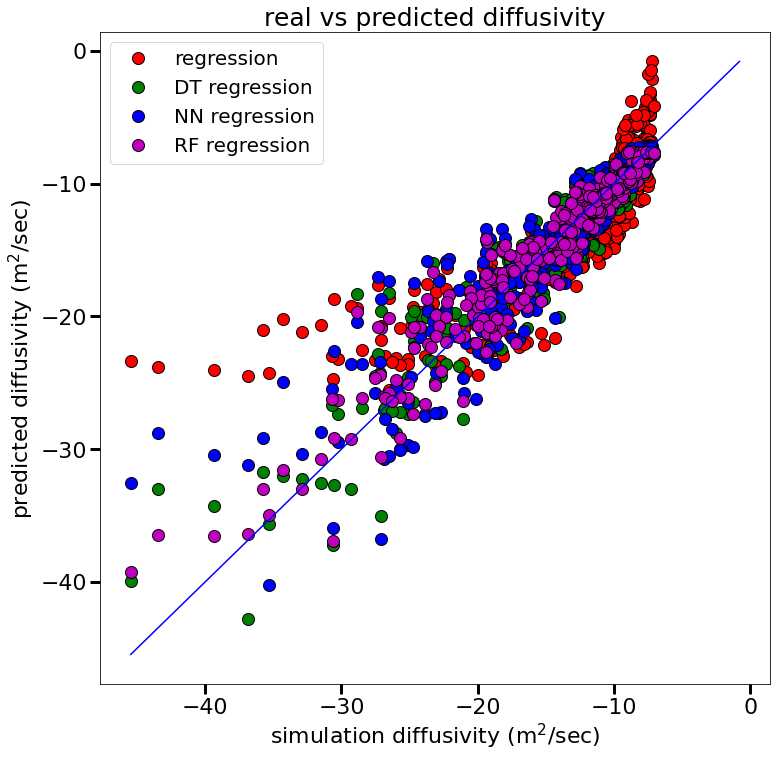

In [42]:
plt.plot(data_y, data_yhat_regr, 'o', label='regression', c='r', markersize='12', linewidth=3, markeredgecolor='k')
plt.plot(data_y, data_yhat_tree, 'o', label='DT regression', c='g', markersize='12', linewidth=3, markeredgecolor='k')
plt.plot(data_y, data_yhat_NN, 'o', label='NN regression', c='b', markersize='12', linewidth=3, markeredgecolor='k')
plt.plot(data_y, data_yhat_RF, 'o', label='RF regression', c='m', markersize='12', linewidth=3, markeredgecolor='k')

plt.title ('real vs predicted diffusivity',fontsize=25)
plt.xlabel('simulation diffusivity ($\mathregular{m^{2}}$/sec)', fontsize=22)
plt.ylabel('predicted diffusivity ($\mathregular{m^{2}}$/sec)',fontsize=22)
plt.legend(loc='upper left', fontsize=20)

p1 = max(max(data_y), max(data_yhat_regr))
p2 = min(min(data_y), min(data_yhat_regr))
plt.plot([p1, p2], [p1, p2],'b-' )

# plt.ylim(1.5, 5)
# plt.xlim(1.5, 5)

plt.tick_params(which='both', width=3)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', length=4, color='r')
plt.rcParams["figure.figsize"] = (12,12)

plt.yticks(fontsize=22)
plt.xticks(fontsize=22)

plt.show()

# Add mass in my features

In [30]:
x = np.asanyarray(df2[['aperture', 'diameter', 'mass']])
y = np.asanyarray(df2[['logD']])

x1 = (df2[['aperture', 'diameter', 'mass']])
y1 = (df2[['logD']])

In [31]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

regr = linear_model.LinearRegression()
tree=DecisionTreeRegressor(max_depth=5,random_state=1)
NNregr = MLPRegressor(hidden_layer_sizes=(40, 30, 20, 15, 10), solver='lbfgs', random_state=1, max_iter=4600)
RF = RandomForestRegressor(max_depth=5, random_state=1)

# k-fold cross validation
data_y, data_yhat_tree, data_yhat_NN, data_yhat_regr, data_yhat_RF = list(), list(), list(), list(), list()
kfold = KFold(n_splits=20, shuffle=True, random_state=5)
# enumerate splits
for train_ix, test_ix in kfold.split(x):
    # get data
    train_X, test_X = x[train_ix], x[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    # fit model
    tree.fit(train_X, train_y)
    NNregr.fit(train_X, train_y.ravel())
    regr.fit(train_X, train_y)
    RF.fit(train_X, train_y.ravel())
    
    # make predictions
    yhat_tree = tree.predict(test_X)
    yhat_regr = regr.predict(test_X)
    yhat_NNregr = NNregr.predict(test_X)
    yhat_RF = RF.predict(test_X)

    # store
    data_y.extend(test_y)
    data_yhat_tree.extend(yhat_tree)
    data_yhat_regr.extend(yhat_regr)
    data_yhat_NN.extend(yhat_NNregr)
    data_yhat_RF.extend(yhat_RF)
    
# evaluate the model

R2_DT = (metrics.r2_score(data_y, data_yhat_tree))
Med_ABS_er_DT = (metrics.median_absolute_error(data_y, data_yhat_tree))
Max_error_DT = (metrics.max_error(data_y, data_yhat_tree))
EV_DT = (explained_variance_score(data_y, data_yhat_tree))
Mean_abs_perc_error_DT = (metrics.mean_absolute_percentage_error(data_y, data_yhat_tree))
MSE_DT = (metrics.mean_squared_error(data_y, data_yhat_tree))

R2_regr = (metrics.r2_score(data_y, data_yhat_regr))
Med_ABS_er_regr = (metrics.median_absolute_error(data_y, data_yhat_regr))
Max_error_regr = (metrics.max_error(data_y, data_yhat_regr))
EV_regr = (explained_variance_score(data_y, data_yhat_regr))
Mean_abs_perc_error_regr = (metrics.mean_absolute_percentage_error(data_y, data_yhat_regr))
MSE_regr = (metrics.mean_squared_error(data_y, data_yhat_regr))

R2_NN = (metrics.r2_score(data_y, data_yhat_NN))
Med_ABS_er_NN = (metrics.median_absolute_error(data_y, data_yhat_NN))
Max_error_NN = (metrics.max_error(data_y, data_yhat_NN))
EV_NN = (explained_variance_score(data_y, data_yhat_NN))
Mean_abs_perc_error_NN = (metrics.mean_absolute_percentage_error(data_y, data_yhat_NN))
MSE_NN = (metrics.mean_squared_error(data_y, data_yhat_NN))

R2_RF = (metrics.r2_score(data_y, data_yhat_RF))
Med_ABS_er_RF = (metrics.median_absolute_error(data_y, data_yhat_RF))
Max_error_RF = (metrics.max_error(data_y, data_yhat_RF))
EV_RF = (explained_variance_score(data_y, data_yhat_RF))
Mean_abs_perc_error_RF = (metrics.mean_absolute_percentage_error(data_y, data_yhat_RF))
MSE_RF = (metrics.mean_squared_error(data_y, data_yhat_RF))


head = ["Model", "R2", "Med ABS error", "Max error", "explained variance", "Mean ABS perc error", "MSE" ]

results = [["Decision tree", R2_DT, Med_ABS_er_DT, Max_error_DT, EV_DT, Mean_abs_perc_error_DT, MSE_DT],
           ["Regression", R2_regr, Med_ABS_er_regr, Max_error_regr, EV_regr, Mean_abs_perc_error_regr, MSE_regr],
           ["Neural Network", R2_NN, Med_ABS_er_NN, Max_error_NN, EV_NN, Mean_abs_perc_error_NN, MSE_NN],
           ["Random Forest", R2_RF, Med_ABS_er_RF, Max_error_RF, EV_RF, Mean_abs_perc_error_RF, MSE_RF]]

print(tabulate(results, headers = head, tablefmt = "fancy_grid", floatfmt=".3f"))

╒════════════════╤═══════╤═════════════════╤═════════════╤══════════════════════╤═══════════════════════╤════════╕
│ Model          │    R2 │   Med ABS error │   Max error │   explained variance │   Mean ABS perc error │    MSE │
╞════════════════╪═══════╪═════════════════╪═════════════╪══════════════════════╪═══════════════════════╪════════╡
│ Decision tree  │ 0.914 │           0.621 │      10.458 │                0.914 │                 0.076 │  3.196 │
├────────────────┼───────┼─────────────────┼─────────────┼──────────────────────┼───────────────────────┼────────┤
│ Regression     │ 0.672 │           2.014 │      21.843 │                0.672 │                 0.195 │ 12.157 │
├────────────────┼───────┼─────────────────┼─────────────┼──────────────────────┼───────────────────────┼────────┤
│ Neural Network │ 0.870 │           0.763 │      13.627 │                0.870 │                 0.088 │  4.821 │
├────────────────┼───────┼─────────────────┼─────────────┼──────────────────────

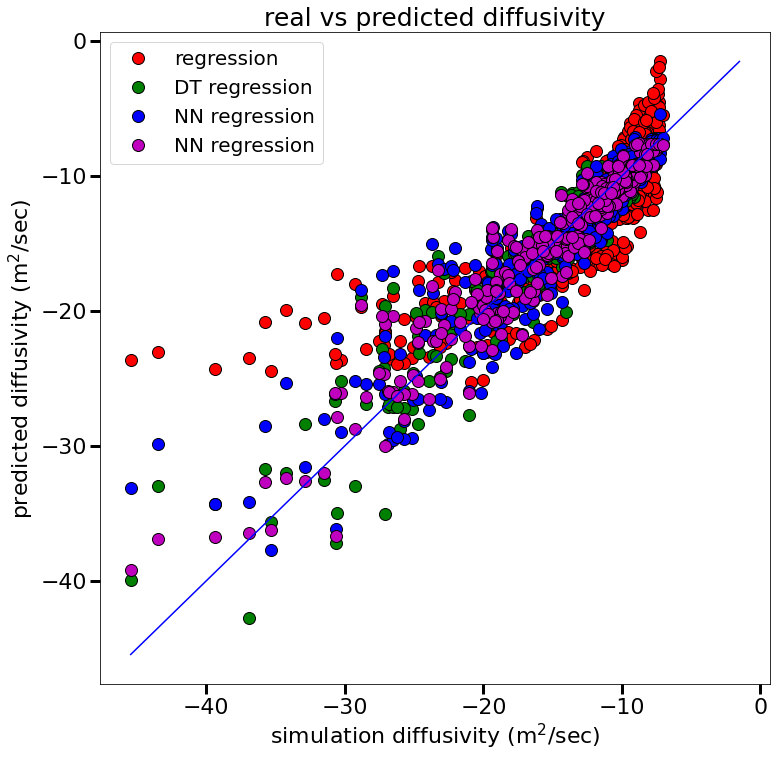

In [32]:
plt.plot(data_y, data_yhat_regr, 'o', label='regression', c='r', markersize='12', linewidth=3, markeredgecolor='k')
plt.plot(data_y, data_yhat_tree, 'o', label='DT regression', c='g', markersize='12', linewidth=3, markeredgecolor='k')
plt.plot(data_y, data_yhat_NN, 'o', label='NN regression', c='b', markersize='12', linewidth=3, markeredgecolor='k')
plt.plot(data_y, data_yhat_RF, 'o', label='NN regression', c='m', markersize='12', linewidth=3, markeredgecolor='k')

plt.title ('real vs predicted diffusivity',fontsize=25)
plt.xlabel('simulation diffusivity ($\mathregular{m^{2}}$/sec)', fontsize=22)
plt.ylabel('predicted diffusivity ($\mathregular{m^{2}}$/sec)',fontsize=22)
plt.legend(loc='upper left', fontsize=20)

p1 = max(max(data_y), max(data_yhat_regr))
p2 = min(min(data_y), min(data_yhat_regr))
plt.plot([p1, p2], [p1, p2],'b-' )

# plt.ylim(1.5, 5)
# plt.xlim(1.5, 5)

plt.tick_params(which='both', width=3)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', length=4, color='r')
plt.rcParams["figure.figsize"] = (12,12)

plt.yticks(fontsize=22)
plt.xticks(fontsize=22)

plt.show()

# Add ascentricF in my features

In [33]:
x = np.asanyarray(df2[['aperture', 'diameter', 'mass', 'ascentricF']])
y = np.asanyarray(df2[['logD']])

x1 = (df2[['aperture', 'diameter', 'mass', 'ascentricF']])
y1 = (df2[['logD']])

In [34]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

regr = linear_model.LinearRegression()
tree=DecisionTreeRegressor(max_depth=5,random_state=1)
NNregr = MLPRegressor(hidden_layer_sizes=(40, 30, 20, 15, 10), solver='lbfgs', random_state=1, max_iter=4600)
RF = RandomForestRegressor(max_depth=5, random_state=1)

# k-fold cross validation
data_y, data_yhat_tree, data_yhat_NN, data_yhat_regr, data_yhat_RF = list(), list(), list(), list(), list()
kfold = KFold(n_splits=20, shuffle=True, random_state=5)
# enumerate splits
for train_ix, test_ix in kfold.split(x):
    # get data
    train_X, test_X = x[train_ix], x[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    # fit model
    tree.fit(train_X, train_y)
    NNregr.fit(train_X, train_y.ravel())
    regr.fit(train_X, train_y)
    RF.fit(train_X, train_y.ravel())
    
    # make predictions
    yhat_tree = tree.predict(test_X)
    yhat_regr = regr.predict(test_X)
    yhat_NNregr = NNregr.predict(test_X)
    yhat_RF = RF.predict(test_X)

    # store
    data_y.extend(test_y)
    data_yhat_tree.extend(yhat_tree)
    data_yhat_regr.extend(yhat_regr)
    data_yhat_NN.extend(yhat_NNregr)
    data_yhat_RF.extend(yhat_RF)
    
# evaluate the model

R2_DT = (metrics.r2_score(data_y, data_yhat_tree))
Med_ABS_er_DT = (metrics.median_absolute_error(data_y, data_yhat_tree))
Max_error_DT = (metrics.max_error(data_y, data_yhat_tree))
EV_DT = (explained_variance_score(data_y, data_yhat_tree))
Mean_abs_perc_error_DT = (metrics.mean_absolute_percentage_error(data_y, data_yhat_tree))
MSE_DT = (metrics.mean_squared_error(data_y, data_yhat_tree))

R2_regr = (metrics.r2_score(data_y, data_yhat_regr))
Med_ABS_er_regr = (metrics.median_absolute_error(data_y, data_yhat_regr))
Max_error_regr = (metrics.max_error(data_y, data_yhat_regr))
EV_regr = (explained_variance_score(data_y, data_yhat_regr))
Mean_abs_perc_error_regr = (metrics.mean_absolute_percentage_error(data_y, data_yhat_regr))
MSE_regr = (metrics.mean_squared_error(data_y, data_yhat_regr))

R2_NN = (metrics.r2_score(data_y, data_yhat_NN))
Med_ABS_er_NN = (metrics.median_absolute_error(data_y, data_yhat_NN))
Max_error_NN = (metrics.max_error(data_y, data_yhat_NN))
EV_NN = (explained_variance_score(data_y, data_yhat_NN))
Mean_abs_perc_error_NN = (metrics.mean_absolute_percentage_error(data_y, data_yhat_NN))
MSE_NN = (metrics.mean_squared_error(data_y, data_yhat_NN))

R2_RF = (metrics.r2_score(data_y, data_yhat_RF))
Med_ABS_er_RF = (metrics.median_absolute_error(data_y, data_yhat_RF))
Max_error_RF = (metrics.max_error(data_y, data_yhat_RF))
EV_RF = (explained_variance_score(data_y, data_yhat_RF))
Mean_abs_perc_error_RF = (metrics.mean_absolute_percentage_error(data_y, data_yhat_RF))
MSE_RF = (metrics.mean_squared_error(data_y, data_yhat_RF))


head = ["Model", "R2", "Med ABS error", "Max error", "explained variance", "Mean ABS perc error", "MSE" ]

results = [["Decision tree", R2_DT, Med_ABS_er_DT, Max_error_DT, EV_DT, Mean_abs_perc_error_DT, MSE_DT],
           ["Regression", R2_regr, Med_ABS_er_regr, Max_error_regr, EV_regr, Mean_abs_perc_error_regr, MSE_regr],
           ["Neural Network", R2_NN, Med_ABS_er_NN, Max_error_NN, EV_NN, Mean_abs_perc_error_NN, MSE_NN],
           ["Random Forest", R2_RF, Med_ABS_er_RF, Max_error_RF, EV_RF, Mean_abs_perc_error_RF, MSE_RF]]

print(tabulate(results, headers = head, tablefmt = "fancy_grid", floatfmt=".3f"))

╒════════════════╤═══════╤═════════════════╤═════════════╤══════════════════════╤═══════════════════════╤════════╕
│ Model          │    R2 │   Med ABS error │   Max error │   explained variance │   Mean ABS perc error │    MSE │
╞════════════════╪═══════╪═════════════════╪═════════════╪══════════════════════╪═══════════════════════╪════════╡
│ Decision tree  │ 0.914 │           0.621 │      10.458 │                0.914 │                 0.076 │  3.196 │
├────────────────┼───────┼─────────────────┼─────────────┼──────────────────────┼───────────────────────┼────────┤
│ Regression     │ 0.673 │           1.890 │      21.980 │                0.673 │                 0.196 │ 12.134 │
├────────────────┼───────┼─────────────────┼─────────────┼──────────────────────┼───────────────────────┼────────┤
│ Neural Network │ 0.863 │           0.709 │      13.994 │                0.863 │                 0.088 │  5.079 │
├────────────────┼───────┼─────────────────┼─────────────┼──────────────────────

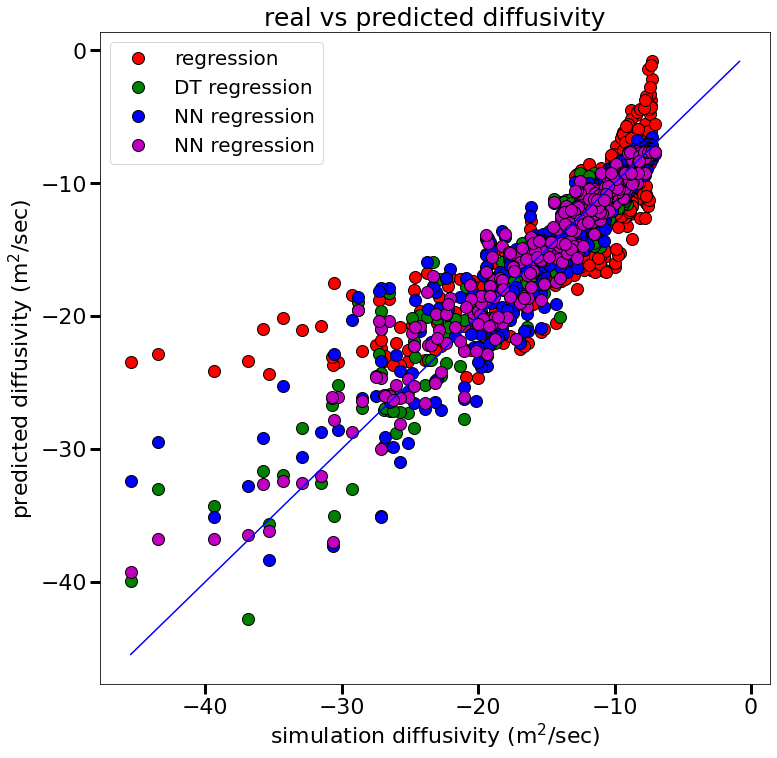

In [35]:
plt.plot(data_y, data_yhat_regr, 'o', label='regression', c='r', markersize='12', linewidth=3, markeredgecolor='k')
plt.plot(data_y, data_yhat_tree, 'o', label='DT regression', c='g', markersize='12', linewidth=3, markeredgecolor='k')
plt.plot(data_y, data_yhat_NN, 'o', label='NN regression', c='b', markersize='12', linewidth=3, markeredgecolor='k')
plt.plot(data_y, data_yhat_RF, 'o', label='NN regression', c='m', markersize='12', linewidth=3, markeredgecolor='k')

plt.title ('real vs predicted diffusivity',fontsize=25)
plt.xlabel('simulation diffusivity ($\mathregular{m^{2}}$/sec)', fontsize=22)
plt.ylabel('predicted diffusivity ($\mathregular{m^{2}}$/sec)',fontsize=22)
plt.legend(loc='upper left', fontsize=20)

p1 = max(max(data_y), max(data_yhat_regr))
p2 = min(min(data_y), min(data_yhat_regr))
plt.plot([p1, p2], [p1, p2],'b-' )

# plt.ylim(1.5, 5)
# plt.xlim(1.5, 5)

plt.tick_params(which='both', width=3)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', length=4, color='r')
plt.rcParams["figure.figsize"] = (12,12)

plt.yticks(fontsize=22)
plt.xticks(fontsize=22)

plt.show()

# Add kinetic diameterin my features

In [36]:
x = np.asanyarray(df2[['aperture', 'diameter', 'mass', 'kdiameter', 'ascentricF']])
y = np.asanyarray(df2[['logD']])

x1 = (df2[['aperture', 'diameter', 'mass', 'kdiameter', 'ascentricF']])
y1 = (df2[['logD']])

In [64]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

regr = linear_model.LinearRegression()
tree=DecisionTreeRegressor(max_depth=5,random_state=1)
NNregr = MLPRegressor(hidden_layer_sizes=(40, 30, 20, 15, 10), solver='lbfgs', random_state=1, max_iter=20600)
RF = RandomForestRegressor(max_depth=5, random_state=1)

# k-fold cross validation
data_y, data_yhat_tree, data_yhat_NN, data_yhat_regr, data_yhat_RF = list(), list(), list(), list(), list()
kfold = KFold(n_splits=20, shuffle=True, random_state=5)
# enumerate splits
for train_ix, test_ix in kfold.split(x):
    # get data
    train_X, test_X = x[train_ix], x[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    # fit model
    tree.fit(train_X, train_y)
    NNregr.fit(train_X, train_y.ravel())
    regr.fit(train_X, train_y)
    RF.fit(train_X, train_y.ravel())
    
    # make predictions
    yhat_tree = tree.predict(test_X)
    yhat_regr = regr.predict(test_X)
    yhat_NNregr = NNregr.predict(test_X)
    yhat_RF = RF.predict(test_X)

    # store
    data_y.extend(test_y)
    data_yhat_tree.extend(yhat_tree)
    data_yhat_regr.extend(yhat_regr)
    data_yhat_NN.extend(yhat_NNregr)
    data_yhat_RF.extend(yhat_RF)
    
# evaluate the model

R2_DT = (metrics.r2_score(data_y, data_yhat_tree))
Med_ABS_er_DT = (metrics.median_absolute_error(data_y, data_yhat_tree))
Max_error_DT = (metrics.max_error(data_y, data_yhat_tree))
EV_DT = (explained_variance_score(data_y, data_yhat_tree))
Mean_abs_perc_error_DT = (metrics.mean_absolute_percentage_error(data_y, data_yhat_tree))
MSE_DT = (metrics.mean_squared_error(data_y, data_yhat_tree))

R2_regr = (metrics.r2_score(data_y, data_yhat_regr))
Med_ABS_er_regr = (metrics.median_absolute_error(data_y, data_yhat_regr))
Max_error_regr = (metrics.max_error(data_y, data_yhat_regr))
EV_regr = (explained_variance_score(data_y, data_yhat_regr))
Mean_abs_perc_error_regr = (metrics.mean_absolute_percentage_error(data_y, data_yhat_regr))
MSE_regr = (metrics.mean_squared_error(data_y, data_yhat_regr))

R2_NN = (metrics.r2_score(data_y, data_yhat_NN))
Med_ABS_er_NN = (metrics.median_absolute_error(data_y, data_yhat_NN))
Max_error_NN = (metrics.max_error(data_y, data_yhat_NN))
EV_NN = (explained_variance_score(data_y, data_yhat_NN))
Mean_abs_perc_error_NN = (metrics.mean_absolute_percentage_error(data_y, data_yhat_NN))
MSE_NN = (metrics.mean_squared_error(data_y, data_yhat_NN))

R2_RF = (metrics.r2_score(data_y, data_yhat_RF))
Med_ABS_er_RF = (metrics.median_absolute_error(data_y, data_yhat_RF))
Max_error_RF = (metrics.max_error(data_y, data_yhat_RF))
EV_RF = (explained_variance_score(data_y, data_yhat_RF))
Mean_abs_perc_error_RF = (metrics.mean_absolute_percentage_error(data_y, data_yhat_RF))
MSE_RF = (metrics.mean_squared_error(data_y, data_yhat_RF))


head = ["Model", "R2", "Med ABS error", "Max error", "explained variance", "Mean ABS perc error", "MSE" ]

results = [["Decision tree", R2_DT, Med_ABS_er_DT, Max_error_DT, EV_DT, Mean_abs_perc_error_DT, MSE_DT],
           ["Regression", R2_regr, Med_ABS_er_regr, Max_error_regr, EV_regr, Mean_abs_perc_error_regr, MSE_regr],
           ["Neural Network", R2_NN, Med_ABS_er_NN, Max_error_NN, EV_NN, Mean_abs_perc_error_NN, MSE_NN],
           ["Random Forest", R2_RF, Med_ABS_er_RF, Max_error_RF, EV_RF, Mean_abs_perc_error_RF, MSE_RF]]

print(tabulate(results, headers = head, tablefmt = "fancy_grid", floatfmt=".3f"))

╒════════════════╤═══════╤═════════════════╤═════════════╤══════════════════════╤═══════════════════════╤════════╕
│ Model          │    R2 │   Med ABS error │   Max error │   explained variance │   Mean ABS perc error │    MSE │
╞════════════════╪═══════╪═════════════════╪═════════════╪══════════════════════╪═══════════════════════╪════════╡
│ Decision tree  │ 0.914 │           0.631 │      10.458 │                0.914 │                 0.076 │  3.203 │
├────────────────┼───────┼─────────────────┼─────────────┼──────────────────────┼───────────────────────┼────────┤
│ Regression     │ 0.694 │           1.922 │      22.079 │                0.694 │                 0.187 │ 11.349 │
├────────────────┼───────┼─────────────────┼─────────────┼──────────────────────┼───────────────────────┼────────┤
│ Neural Network │ 0.862 │           0.655 │      14.884 │                0.862 │                 0.085 │  5.123 │
├────────────────┼───────┼─────────────────┼─────────────┼──────────────────────

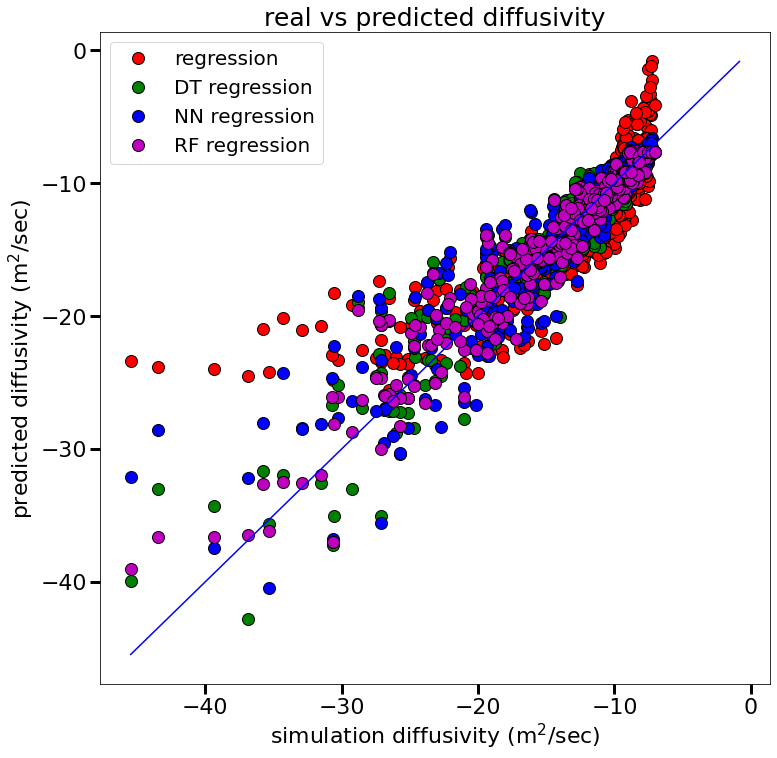

In [65]:
plt.plot(data_y, data_yhat_regr, 'o', label='regression', c='r', markersize='12', linewidth=3, markeredgecolor='k')
plt.plot(data_y, data_yhat_tree, 'o', label='DT regression', c='g', markersize='12', linewidth=3, markeredgecolor='k')
plt.plot(data_y, data_yhat_NN, 'o', label='NN regression', c='b', markersize='12', linewidth=3, markeredgecolor='k')
plt.plot(data_y, data_yhat_RF, 'o', label='RF regression', c='m', markersize='12', linewidth=3, markeredgecolor='k')

plt.title ('real vs predicted diffusivity',fontsize=25)
plt.xlabel('simulation diffusivity ($\mathregular{m^{2}}$/sec)', fontsize=22)
plt.ylabel('predicted diffusivity ($\mathregular{m^{2}}$/sec)',fontsize=22)
plt.legend(loc='upper left', fontsize=20)

p1 = max(max(data_y), max(data_yhat_regr))
p2 = min(min(data_y), min(data_yhat_regr))
plt.plot([p1, p2], [p1, p2],'b-' )

# plt.ylim(1.5, 5)
# plt.xlim(1.5, 5)

plt.tick_params(which='both', width=3)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', length=4, color='r')
plt.rcParams["figure.figsize"] = (12,12)

plt.yticks(fontsize=22)
plt.xticks(fontsize=22)

plt.show()

In [43]:
import mlxtend
from mlxtend.evaluate import paired_ttest_5x2cv

In [55]:
tree=DecisionTreeRegressor(random_state=1, max_depth=5)
rf = RandomForestRegressor(max_depth=5, random_state=1)

t, p = paired_ttest_5x2cv(estimator1=tree,
                          estimator2=rf,
                          X=x, y=y.ravel(),
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: -2.857
p value: 0.036


In [45]:
from mlxtend.evaluate import paired_ttest_kfold_cv

In [56]:
t, p = paired_ttest_kfold_cv(estimator1=tree,
                          estimator2=rf,
                          X=x, y=y.ravel(),
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: -1.678
p value: 0.128


In [57]:
tree=DecisionTreeRegressor(random_state=1, max_depth=5)
regr = linear_model.LinearRegression()

t, p = paired_ttest_5x2cv(estimator1=tree,
                          estimator2=regr,
                          X=x, y=y,
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 3.157
p value: 0.025
